<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Segmentación por clustering. Caso EM</h2>

### Mixtura de Gausianas - Expectación Maximización (EM)
#### Author: Pedro Latorre Carmona
#### Curso: 2024-2025

Versión 1.0

---

En esta práctica, la idea es aplicar el algoritmo de agrupamiento de EM a una imagen sin ruido, y a otra imagen a la que le vais a añadir ruido Gausiano de un determinado valor de *desviación estándar*.


### Mixtura de Gausianas (Mixture of Gaussians, o MoGs)

El algoritmo de mixtura de Gausianas intenta resolver e inferir cuáles son las características, número y peso de un conjunto de Gausianas, en un espacio $D-$dimensional que permitirían modelizar una determinada distribución de datos.

Supongamos un **vector de características** que representa un dato que queremos clasificar. La distribución de probabilidad de ese vector de características a lo largo del espacio que lo define se puede poner como:

$p(\mathbf{x}) = \sum_{j=1}^{m} p(\Omega_{j})\cdot p(\mathbf{x}|\Omega_{j})$

Una función Gausiana en un espacio $D-$dimensional puede escribirse de la siguiente forma:

$p(\mathbf{x}|\Omega_{j})=\frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma_{j}|^{\frac{1}{2}}}\exp\left(-\frac{1}{2}([\mathbf{x}-\mathbf{\mu}_{j}]^{T}\Sigma_{j}^{-1}[\mathbf{x}-\mathbf{\mu}_{j}])\right)$

donde:

1. $\mathbf{\mu}_{j}$ es el vector que representa las coordenadas del **centroide** j-ésimo
2. $\Sigma_{j}$ es la matriz de covarianza asociada al *clúster* j-ésimo

## ¿Qué resuelve el algoritmo de mixtura de Gausianas?

Lo que indica es el grupo al que pertenece un vector, $\mathbf{x}$, porque busca:

$j\equiv\max_{j\in\Omega_{i}} \left\{p(\Omega_{j}|\mathbf{x})\right\}$

## Método de resolución

Normalmente, el método que se usa para resolver este problema de optimización es el denominado de **expectación**-**maximización** (**EM**). Consta de dos partes:

1. Paso **E** (Expectación):

<img src="pics/PasoE.png">

2. Paso **M** (Maximización):

<img src="pics/PasoM.png">

## ¿Cuándo *pararía* el algoritmo?

Hay diversas formas de establecer que el algoritmo ha **convergido**:

1. Considerar que los centroides, así como las matrices de covarianza, no han *cambiado*. Esto, en realidad, tendría que reflejarse en que:

$\|\Sigma_{j}^{(t+1)}-\Sigma_{j}^{(t)}\|_{2}\leq \epsilon_{1}, \forall j$

$\|\mathbf{\mu}_{j}^{(t+1)}-\mathbf{\mu}_{j}^{(t)}\|_{2}\leq \epsilon_{2}, \forall j$

Podemos considerar: $\epsilon_{1}=\epsilon_{2}=\epsilon$

2. Hacer un número máximo de iteraciones.

---

- Para el caso de la **Mixtura de Gausianas** habría que analizar:

    1. El número de Gausianas
    2. El valor del umbral de parada
    3. El número de iteraciones
    4. La forma de las matrices de covarianza
    5. El efecto del ruido de la imagen, en la calidad de la segmentación


Hay que usar el código que ya tiene **sklearn.mixture** de **Mixturas de Gausianas**.

---

# Representación 3D de la imgane original en el espacio RGB

In [5]:
%pip install Pillow
%pip install matplotlib

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.8/7.8 MB 10.9 MB/s eta 0:00:00
     ------------------------------------- 219.8/219.8 kB 14.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 56.0/56.0 kB 2.9 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 13.4 MB/s eta 0:00:00
     -------------------------------------- 106.9/106.9 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Cargar la imagen proporcionada
image_path = './Imagen-4Grupos-SinRuido-7Nov2024.png'
image = Image.open(image_path)



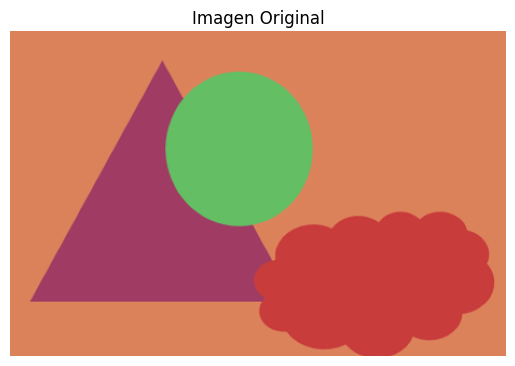

In [7]:
# Mostrar la imagen original
plt.imshow(image)
plt.title("Imagen Original")
plt.axis("off")
plt.show()


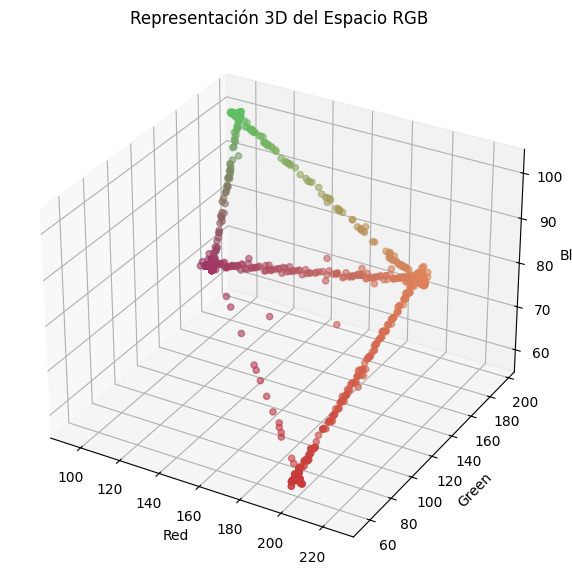

In [8]:
# Redimensionar para facilitar el procesamiento
image_resized = image.resize((100, 100))
pixels = np.array(image_resized)

# Separar los canales R, G, B
r, g, b = pixels[:, :, 0].flatten(), pixels[:, :, 1].flatten(), pixels[:, :, 2].flatten()

# Crear un gráfico 3D del espacio RGB
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos RGB
ax.scatter(r, g, b, c=np.array([r, g, b]).T / 255, marker='o', alpha=0.6)

# Etiquetas y configuraciones
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.set_title("Representación 3D del Espacio RGB")

plt.show()

## PUEBA DE SEGMANETACIÓN

In [10]:
%pip install scikit-learn

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 11.0/11.0 MB 43.5 MB/s eta 0:00:00
     --------------------------------------- 44.8/44.8 MB 16.4 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
# 1. Cargar la imagen
imagen = Image.open('./Imagen-4Grupos-SinRuido-7Nov2024.png')
imagen = imagen.convert('RGB')
datos = np.array(imagen)



In [12]:
# 2. Preparar los datos RGB
R = datos[:, :, 0].flatten()
G = datos[:, :, 1].flatten()
B = datos[:, :, 2].flatten()
X = np.vstack((R, G, B)).T  # Forma: (n_píxeles, 3)

In [13]:
# 3. Aplicar el algoritmo EM (GMM)
n_clusters = 5  # Puedes cambiar este valor
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
colores = gmm.means_.astype(int)

In [14]:
# 4. Crear la imagen cuantizada
X_colored = colores[labels]
imagen_coloreada = X_colored.reshape(datos.shape)
imagen_coloreada = Image.fromarray(imagen_coloreada.astype('uint8'), 'RGB')
imagen_coloreada.save('imagen_cuantizada.jpg')
imagen_coloreada.show()

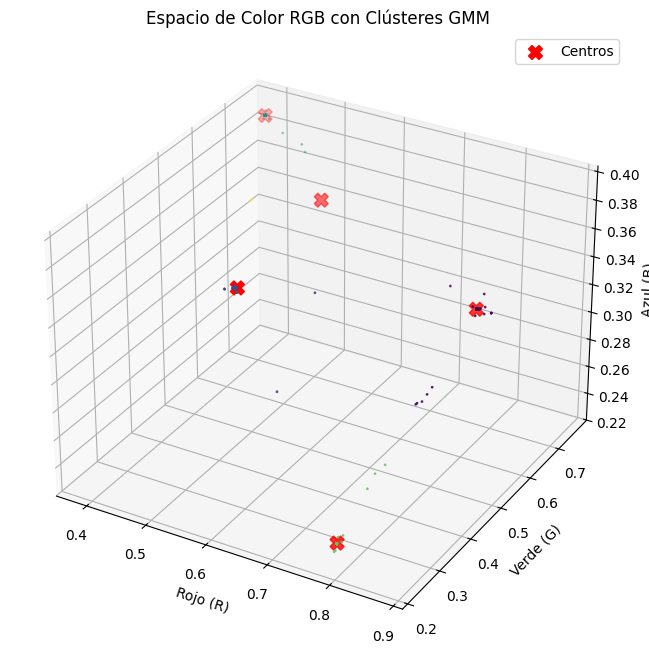

In [15]:
# 5. Visualizar los clústeres en el espacio RGB 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalizar los valores RGB
R_norm = X[:, 0] / 255
G_norm = X[:, 1] / 255
B_norm = X[:, 2] / 255

# Reducir el número de puntos para mejorar el rendimiento
factor_muestreo = 100  # Ajusta según tus necesidades
indices = np.random.choice(len(R_norm), len(R_norm) // factor_muestreo, replace=False)
R_muestra = R_norm[indices]
G_muestra = G_norm[indices]
B_muestra = B_norm[indices]
labels_muestra = labels[indices]
colores_muestra = X[indices] / 255

# Graficar los puntos con colores según los clústeres
scatter = ax.scatter(R_muestra, G_muestra, B_muestra, c=labels_muestra, cmap='viridis', marker='o', s=1)

# Añadir los centros de los clústeres
centros = gmm.means_ / 255
ax.scatter(centros[:, 0], centros[:, 1], centros[:, 2], c='red', marker='X', s=100, label='Centros')

# Etiquetas de los ejes
ax.set_xlabel('Rojo (R)')
ax.set_ylabel('Verde (G)')
ax.set_zlabel('Azul (B)')

# Título del gráfico
ax.set_title('Espacio de Color RGB con Clústeres GMM')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

---
### Adición de ruido Gausiano

Para añadir ruido Gausiano, podéis hacerlo de forma independiente en cada canal de color (R, G, B), siguiendo lo comentado (por ejemplo) en:

https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524


In [16]:
%matplotlib inline

In [19]:
%pip install pandas
%pip install scikit-image

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage import io, util, color
from sklearn.mixture import GaussianMixture

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     --------------------------------------- 12.8/12.8 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.2 MB/s eta 0:00:00
     ------------------------------------- 315.4/315.4 kB 20.3 MB/s eta 0:00:00
     ------------------------------------- 228.2/228.2 kB 14.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:

def add_gaussian_noise(image, std_dev, mean=0, ):
    noisy_image = util.random_noise(image, mode='gaussian', mean=mean, var=(std_dev/255)**2)

    return noisy_image

In [21]:
# Función para añadir ruido gaussiano
def add_gaussian_noise2(image, sigma):
    noisy = image + sigma * np.random.randn(*image.shape)
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [22]:
# Function to segment the image using Gaussian Mixture Model (EM algorithm)
def segment_image(image, n_components=4, max_iter=100):
    # Convert image to grayscale for simplicity in segmentation
    grayscale_image = color.rgb2gray(image)
    pixels = grayscale_image.reshape(-1, 1)  # Flatten the image for GMM input

    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, max_iter=max_iter, random_state=0)
    gmm.fit(pixels)
    segmented = gmm.predict(pixels)
    
    # Reshape the labels to the original image shape
    segmented_image = segmented.reshape(grayscale_image.shape)

    return segmented_image

In [23]:
# Representación 3D del espacio RGB
# Función para graficar el espacio RGB en 3D
def plot_rgb_3d(image, ax):
    # Extraer los canales R, G, B
    r, g, b = image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten()
    # Normalizar y convertir en colores para cada punto
    colors = np.array([r, g, b]).T / 255
    ax.scatter(r, g, b, c=colors, marker='o', alpha=0.6)
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title("Espacio RGB")

In [26]:
def plot_rgb_3d2(image):
    # Extraer los canales R, G, B
    r, g, b = image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten()

    # Crear un gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r, g, b, c=np.array([r, g, b]).T / 255, marker='o', alpha=0.6)

    # Etiquetas y configuraciones
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title("Espacio RGB")


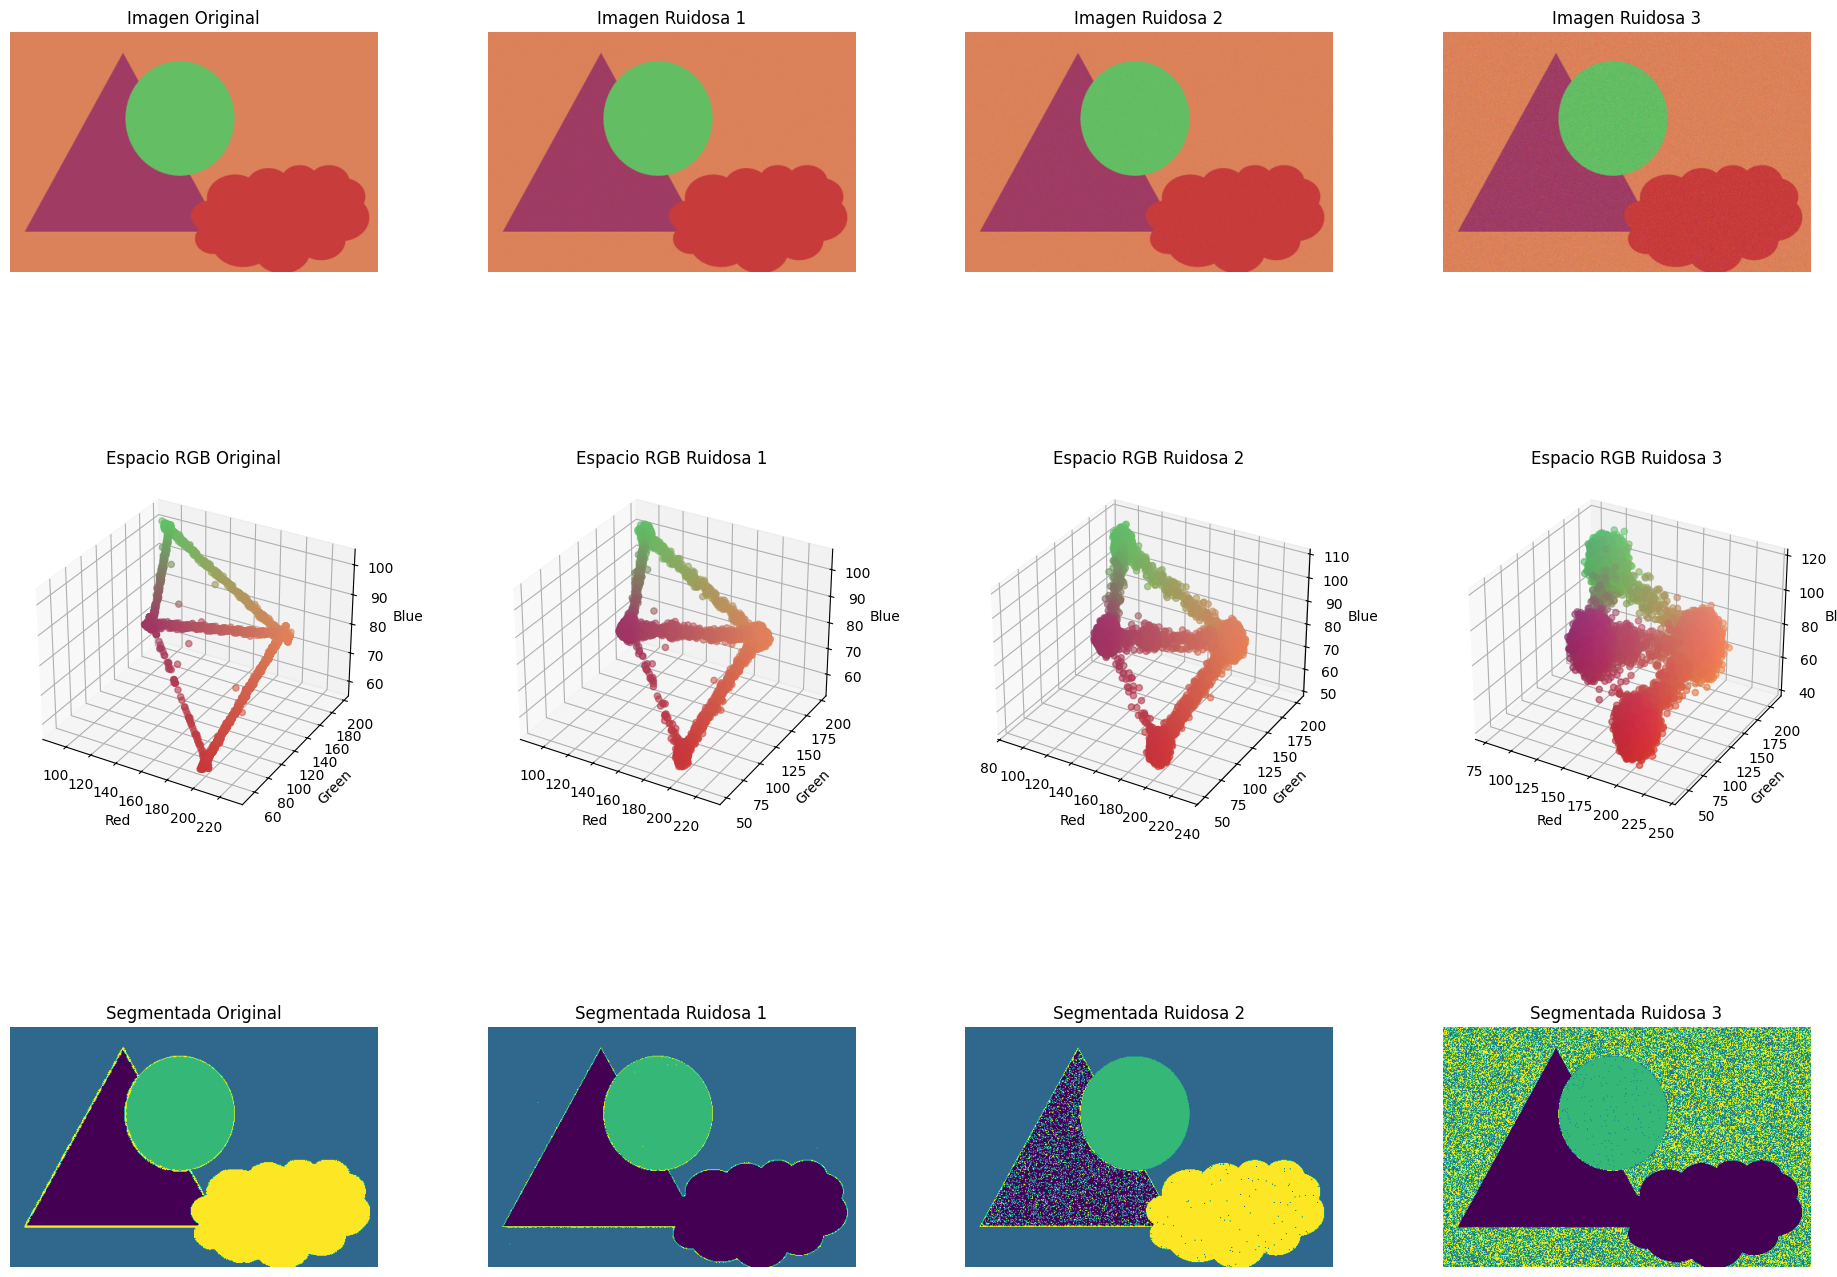

In [33]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from skimage import io

# Supongamos que las funciones `add_gaussian_noise2`, `segment_image` y `plot_rgb_3d` ya están definidas.

# Cargar la imagen
image_path = './Imagen-4Grupos-SinRuido-7Nov2024.png'
image = io.imread(image_path)

# Añadir ruido gaussiano
noisy_images = [
    add_gaussian_noise2(image, 1),
    add_gaussian_noise2(image, 2),
    add_gaussian_noise2(image, 5),
]

# Segmentar imágenes
segmented_images = [segment_image(noisy, n_components=4) for noisy in noisy_images]
segmented_original = segment_image(image, n_components=4)

# Crear figura con subplots
fig = plt.figure(figsize=(20, 15))

# Primera fila: Imágenes originales y ruidosas
for i, img in enumerate([image] + noisy_images):
    ax = fig.add_subplot(3, 4, i + 1)  # Cambié el rango de 2 a 3 filas
    ax.imshow(img)
    ax.axis('off')
    if i == 0:
        ax.set_title("Imagen Original")
    else:
        ax.set_title(f"Imagen Ruidosa {i}")

# Segunda fila: Gráficos 3D del espacio RGB
for i, img in enumerate([image] + noisy_images):
    ax = fig.add_subplot(3, 4, i + 5, projection='3d')  # Alineé con nueva cuadrícula
    plot_rgb_3d(img, ax)
    if i == 0:
        ax.set_title("Espacio RGB Original")
    else:
        ax.set_title(f"Espacio RGB Ruidosa {i}")

# Tercera fila: Imágenes segmentadas
for i, img in enumerate([segmented_original] + segmented_images):
    ax = fig.add_subplot(3, 4, i + 9)  # Alineé con nueva cuadrícula
    ax.imshow(img)
    ax.axis('off')
    if i == 0:
        ax.set_title("Segmentada Original")
    else:
        ax.set_title(f"Segmentada Ruidosa {i}")

# Ajustar márgenes y espacio entre subplots
plt.subplots_adjust(
    left=0.05,  # Margen izquierdo
    right=0.95, # Margen derecho
    top=0.95,   # Margen superior
    bottom=0.05, # Margen inferior
    wspace=0.3,  # Espacio horizontal entre subplots
    hspace=0.4   # Espacio vertical entre subplots
)

# Mostrar figura
plt.show()


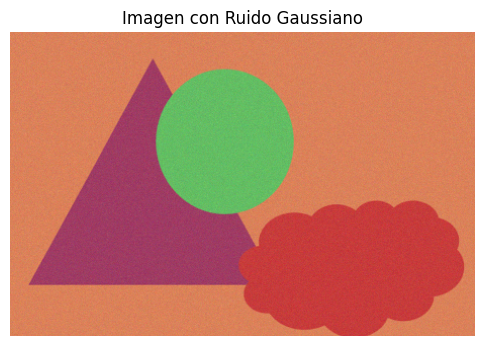

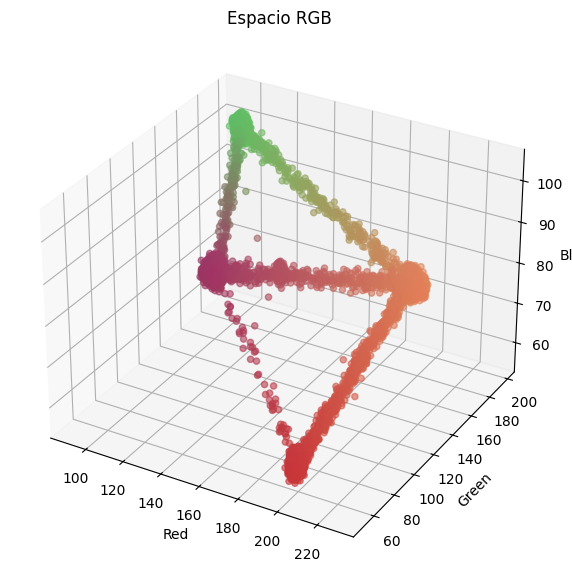

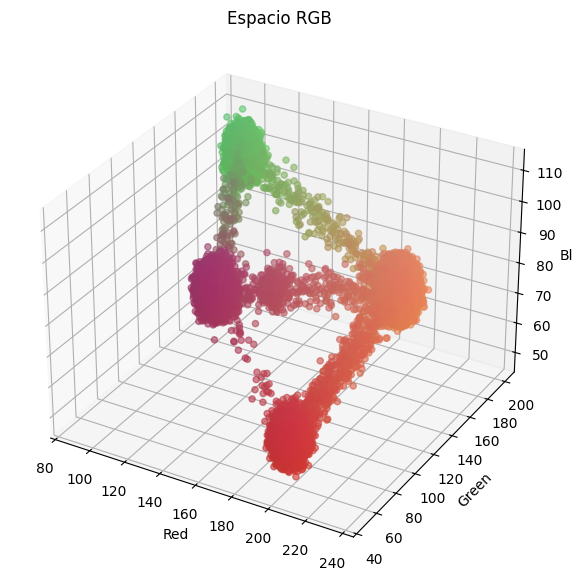

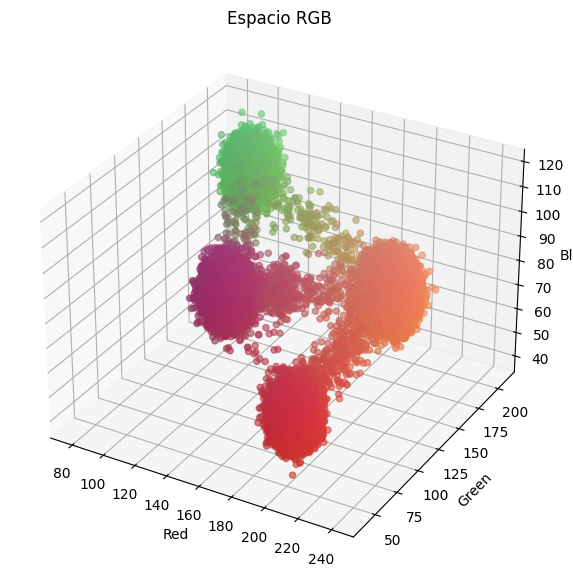

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from skimage import io

# Función para añadir ruido gaussiano
def add_gaussian_noise2(image, sigma):
    noisy = image + sigma * np.random.randn(*image.shape)
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Función para graficar el espacio RGB en 3D
def plot_rgb_3d2(image):
    # Extraer los canales R, G, B
    r, g, b = image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten()

    # Crear un gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r, g, b, c=np.array([r, g, b]).T / 255, marker='o', alpha=0.6)

    # Etiquetas y configuraciones
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title("Espacio RGB")
    plt.show()

# Cargar la imagen
image_path = 'Imagen-4Grupos-SinRuido-7Nov2024.png'
image = io.imread(image_path)

# Añadir ruido gaussiano
noisy_image = add_gaussian_noise2(image, sigma=1)
noisy_image2 = add_gaussian_noise2(image, sigma=3)
noisy_image3 = add_gaussian_noise2(image, sigma=5)

# Mostrar la imagen original con ruido
plt.figure(figsize=(6, 6))
plt.imshow(noisy_image)
plt.imshow(noisy_image2)
plt.imshow(noisy_image3)
plt.axis('off')
plt.title("Imagen con Ruido Gaussiano")
plt.show()

# Representar la imagen ruidosa en el espacio RGB
plot_rgb_3d2(noisy_image)
plot_rgb_3d2(noisy_image2)
plot_rgb_3d2(noisy_image3)


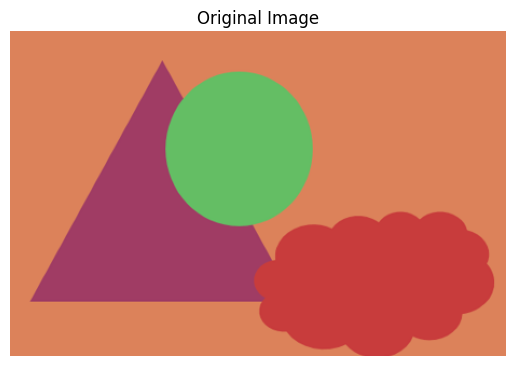

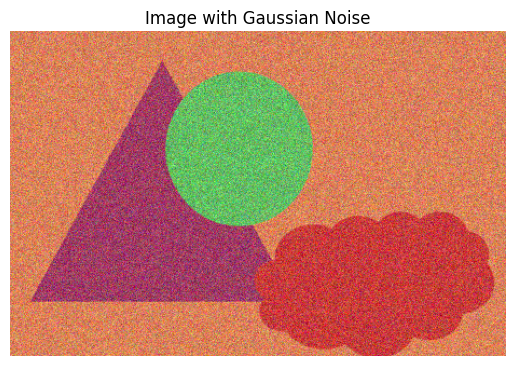

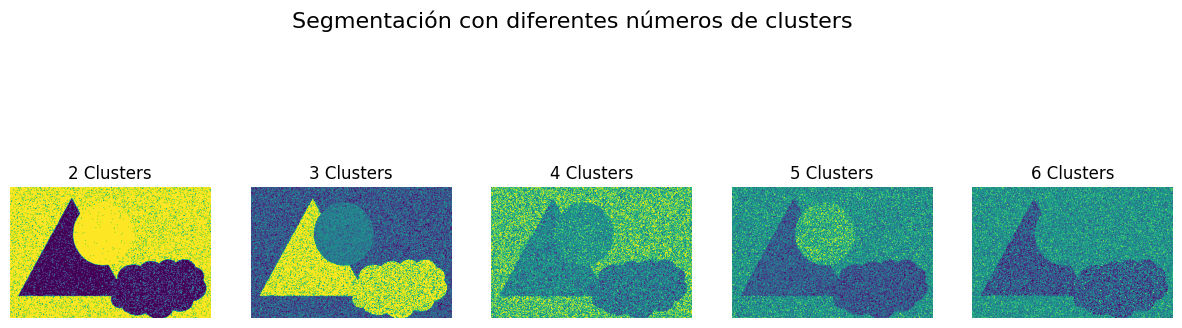

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color
from sklearn.mixture import GaussianMixture

# Cargar y mostrar la imagen original
def load_image(url):
    image = io.imread(url)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()
    return image

# Agregar ruido Gausiano a la imagen
def add_gaussian_noise(image, mean=0, std_dev=25):
    noisy_image = util.random_noise(image, mode='gaussian', mean=mean, var=(std_dev/255)**2)
    plt.imshow(noisy_image)
    plt.axis('off')
    plt.title("Image with Gaussian Noise")
    plt.show()
    return noisy_image

# Ejecutar el experimento variando el número de clusters y mostrando los resultados
def experiment_varying_clusters(image, max_clusters=6, max_iter=100):
    grayscale_image = color.rgb2gray(image)
    pixels = grayscale_image.reshape(-1, 1)

    fig, axes = plt.subplots(1, max_clusters - 1, figsize=(15, 5))
    fig.suptitle("Segmentación con diferentes números de clusters", fontsize=16)

    for n_clusters in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, max_iter=max_iter, random_state=0)
        gmm.fit(pixels)
        segmented = gmm.predict(pixels)
        
        segmented_image = segmented.reshape(grayscale_image.shape)

        ax = axes[n_clusters - 2]
        ax.imshow(segmented_image, cmap='viridis')
        ax.axis('off')
        ax.set_title(f'{n_clusters} Clusters')

    plt.show()

# Ruta de la imagen
image_path = 'Imagen-4Grupos-SinRuido-7Nov2024.png'  # Reemplaza con la ruta correcta a tu imagen

# Ejecutar el pipeline completo
image = load_image(image_path)                   # Cargar la imagen
noisy_image = add_gaussian_noise(image)          # Aplicar ruido
experiment_varying_clusters(noisy_image, max_clusters=6)  # Ejecutar el experimento


In [ ]:
# TODO incluir ruido gausiano a la imagen
# TODO habrá que aplicar el metodo de segmentación con diferentes números de clusters (4 clusters, q son 4 colores) (matriz de covarianza completa) para aplicar  EM con diferentes parametros (nº gausianas, parametros de las diagonales de la matriz de covarianza, )
# TODO discutir los resultados obtenidos importante para la nota
# TODO buena presentación de los resultados
# TODO mosiaco de imagenes con los resultados al variar los parámetros

In [ ]:
#TODO 1. con la imagen original aplicar ruido y obtener otras 3
#TODO 2. realizar una representación 3D de cda una de las imagenes en el espacio RGB
#TODO 3. aplicar algoritmo EM
#TODO 4. recuperamos la matriz de etiquetas y aplicamos un color a cada una de las etiquetas
#TODO 5. Ver la tasa de acierto en cada imagen 
#TODO 6. visualización de cada uno de los pasos y sus resultados en modo mosaico para poder comparar y comentar los resultados. 